In [26]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/dpfkd/Downloads/car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [28]:
# 새로운 컬럼명 지정
df.columns = ['price', 'maint', 'doors', 'person', 'log_cap', 'safety', 'output']
df

,price,maint,doors,person,log_cap,safety,output
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [30]:
print(df['output'].value_counts())

output
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [32]:
#결측치 확인
df.isnull().sum()

price      0
maint      0
doors      0
person     0
log_cap    0
safety     0
output     0
dtype: int64

In [34]:
X = df.drop(['output'], axis=1)  # 피처(입력값)
y = df['output']  # 레이블(정답)

In [36]:
X

,price,maint,doors,person,log_cap,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [38]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: output, Length: 1727, dtype: object

In [40]:
# 원 핫 인코딩
Y = pd.get_dummies(y).values

In [42]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [44]:
X = pd.get_dummies(X).values

In [46]:
X

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ...,  True, False, False]])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [66]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((1381, 21), (1381, 4), (346, 21), (346, 4))

In [80]:
#모델 만들기
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))  # multi class single label , softmax

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',       # 분류용 손실 함수
              metrics=['accuracy'])             # 정확도 지표 사용

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,300 (5.08 KB)

 Trainable params: 1,300 (5.08 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
#학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, 
                    validation_data=(X_test, y_test))

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4590 - loss: 1.2321 - val_accuracy: 0.6994 - val_loss: 0.8587
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7418 - loss: 0.7394 - val_accuracy: 0.7601 - val_loss: 0.6620
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8060 - loss: 0.5531 - val_accuracy: 0.8035 - val_loss: 0.5507
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8255 - loss: 0.4737 - val_accuracy: 0.8092 - val_loss: 0.4638
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8429 - loss: 0.4086 - val_accuracy: 0.8526 - val_loss: 0.3998
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8735 - loss: 0.3392 - val_accuracy: 0.8613 - val_loss: 0.3505
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8878 - loss: 0.2981 - val_accuracy: 0.8786 - val_loss: 0.3041
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9128 - loss: 0.2543 - val_accuracy: 0.9046 - val_loss

In [83]:
X_train

array([[-0.58376082, -0.57595671, -0.58153099, ..., -0.69867485,
         1.39899015, -0.70787496],
       [-0.58376082, -0.57595671,  1.71959881, ..., -0.69867485,
        -0.71480131,  1.41267888],
       [-0.58376082,  1.7362416 , -0.58153099, ...,  1.43128094,
        -0.71480131, -0.70787496],
       ...,
       [ 1.71303034, -0.57595671, -0.58153099, ..., -0.69867485,
         1.39899015, -0.70787496],
       [-0.58376082,  1.7362416 , -0.58153099, ...,  1.43128094,
        -0.71480131, -0.70787496],
       [-0.58376082, -0.57595671,  1.71959881, ...,  1.43128094,
        -0.71480131, -0.70787496]])

In [84]:
y_train

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False, False,  True, False],
       [ True, False, False, False]])

In [88]:
X_test

array([[ 1.71303034, -0.57595671, -0.58153099, ..., -0.69867485,
         1.39899015, -0.70787496],
       [-0.58376082, -0.57595671,  1.71959881, ..., -0.69867485,
         1.39899015, -0.70787496],
       [ 1.71303034, -0.57595671, -0.58153099, ...,  1.43128094,
        -0.71480131, -0.70787496],
       ...,
       [-0.58376082, -0.57595671,  1.71959881, ..., -0.69867485,
         1.39899015, -0.70787496],
       [-0.58376082, -0.57595671, -0.58153099, ..., -0.69867485,
         1.39899015, -0.70787496],
       [-0.58376082, -0.57595671,  1.71959881, ..., -0.69867485,
         1.39899015, -0.70787496]])

In [90]:
y_test

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False]])

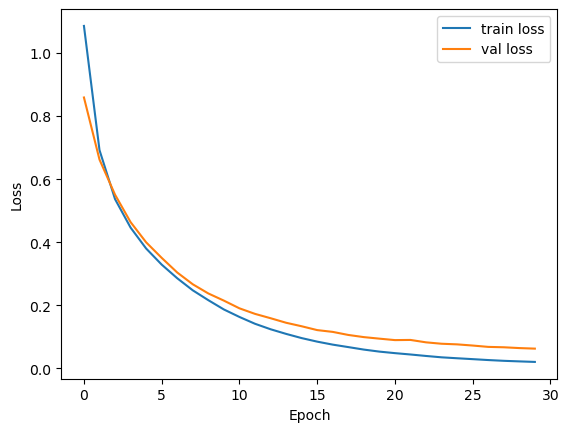

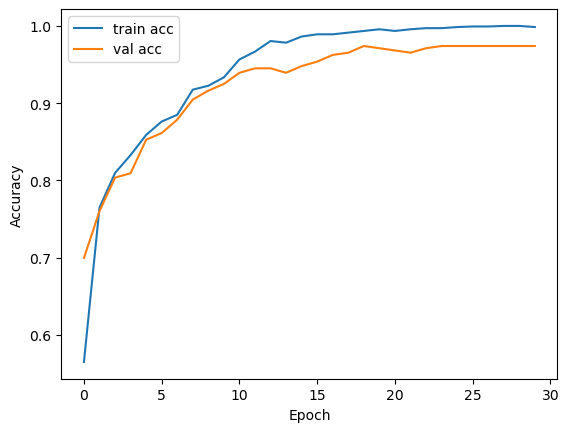

In [93]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9758 - loss: 0.0574 
Test Accuracy: 0.97
